In [ ]:
pip install pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 41.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.8/347.8 kB 36.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [ ]:
 1. Basic Counts & Distribution
Total number of questions

Train/Val/Test split sizes

Questions with vs. without images

Subject-wise and topic-wise counts

In [ ]:
import json
import pandas as pd

with open("ScienceQA_DATA/problems.json") as f:
    problems = json.load(f)

df = pd.DataFrame.from_dict(problems, orient="index")
print(df.shape)              # number of questions
print(df["split"].value_counts())   # train/val/test
print(df["image"].value_counts())   # with/without images
print(df["subject"].value_counts())
print(df["topic"].value_counts().head(10))


(21208, 14)
split
train    12726
test      4241
val       4241
Name: count, dtype: int64
image
image.png    10332
Name: count, dtype: int64
subject
natural science     11487
language science     5371
social science       4350
Name: count, dtype: int64
topic
biology                              4098
physics                              3215
geography                            2956
writing-strategies                   1650
figurative-language                  1260
chemistry                            1194
earth-science                        1152
science-and-engineering-practices     924
units-and-measurement                 870
reference-skills                      724
Name: count, dtype: int64


In [ ]:
## 2. Text Length Analysis
## Length of question

##Length of lecture

##Length of explanation

In [ ]:
df["q_len"] = df["question"].apply(lambda x: len(x.split()))
df["lecture_len"] = df["lecture"].apply(lambda x: len(x.split()))
# df["explanation_len"] = df["explanation"].apply(lambda x: len(x.split()))

df[["q_len", "lecture_len"]].describe()


,q_len,lecture_len
count,21208.000000,21208.000000
mean,12.106658,104.953555
std,8.990023,87.352379
min,3.000000,0.000000
25%,7.000000,51.000000
50%,9.000000,81.000000
75%,15.000000,147.000000
max,141.000000,490.000000


In [ ]:
### 3. Visual Questions Analysis
## How many questions have diagrams?

## Is there a bias across subjects/topics?

In [ ]:
df["has_image"] = df["image"].apply(lambda x: x != "none")
print(df.groupby("subject")["has_image"].mean())
print(df.groupby("topic")["has_image"].mean().sort_values(ascending=False).head(10))


subject
language science    1.0
natural science     1.0
social science      1.0
Name: has_image, dtype: float64
topic
biology                1.0
capitalization         1.0
chemistry              1.0
civics                 1.0
culture                1.0
earth-science          1.0
economics              1.0
figurative-language    1.0
geography              1.0
global-studies         1.0
Name: has_image, dtype: float64


In [ ]:
## 4. Answer Choice Distribution
## Count of number of options per question

## Distribution of correct answer indices

In [ ]:
df["num_choices"] = df["choices"].apply(len)
print(df["num_choices"].value_counts())
print(df["answer"].value_counts())


num_choices
2    11045
3     5078
4     4893
5      192
Name: count, dtype: int64
answer
1    8542
0    8399
2    2961
3    1275
4      31
Name: count, dtype: int64


In [ ]:
## 6. Topic-wise Detail Analysis
## Average question length, image presence, etc. by topic or subject

In [ ]:
df.groupby("topic").agg({
    "q_len": "mean",
    "lecture_len": "mean",
    "has_image": "mean"
}).sort_values(by="has_image", ascending=False).head(10)


,q_len,lecture_len,has_image
topic,,,
biology,10.160810,121.267448,1.0
capitalization,7.590909,63.757576,1.0
chemistry,12.932998,185.927136,1.0
civics,12.603175,45.563492,1.0
culture,8.888889,0.000000,1.0
earth-science,13.020833,108.890625,1.0
economics,14.992669,47.736070,1.0
figurative-language,27.216667,125.455556,1.0
geography,5.782138,20.433356,1.0


In [ ]:
pip install pandas matplotlib seaborn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.5/102.5 kB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 51.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 22.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 325.0/325.0 kB 23.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 47.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 42.9 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.1/111.1 kB 19.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


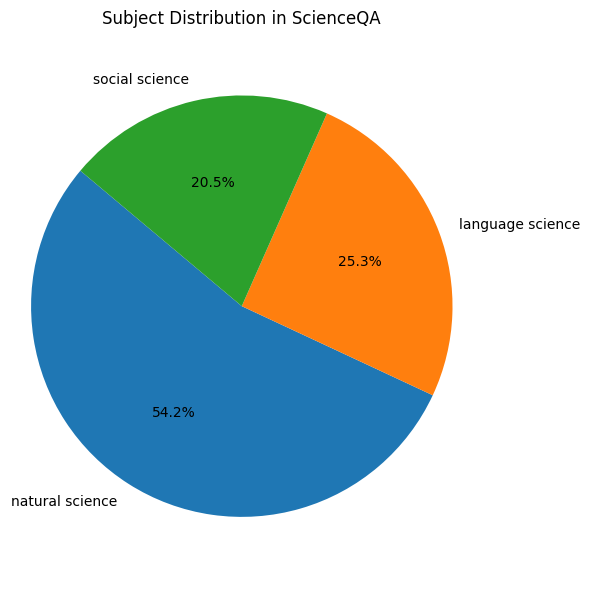

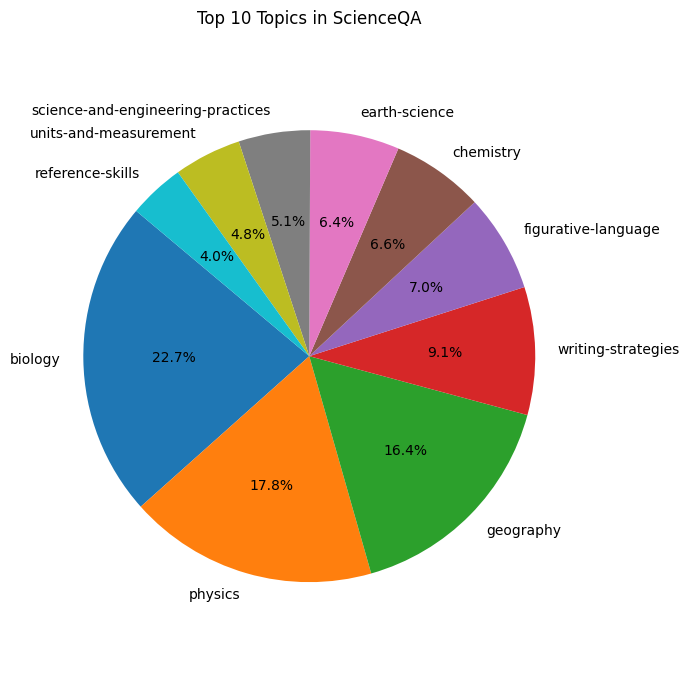

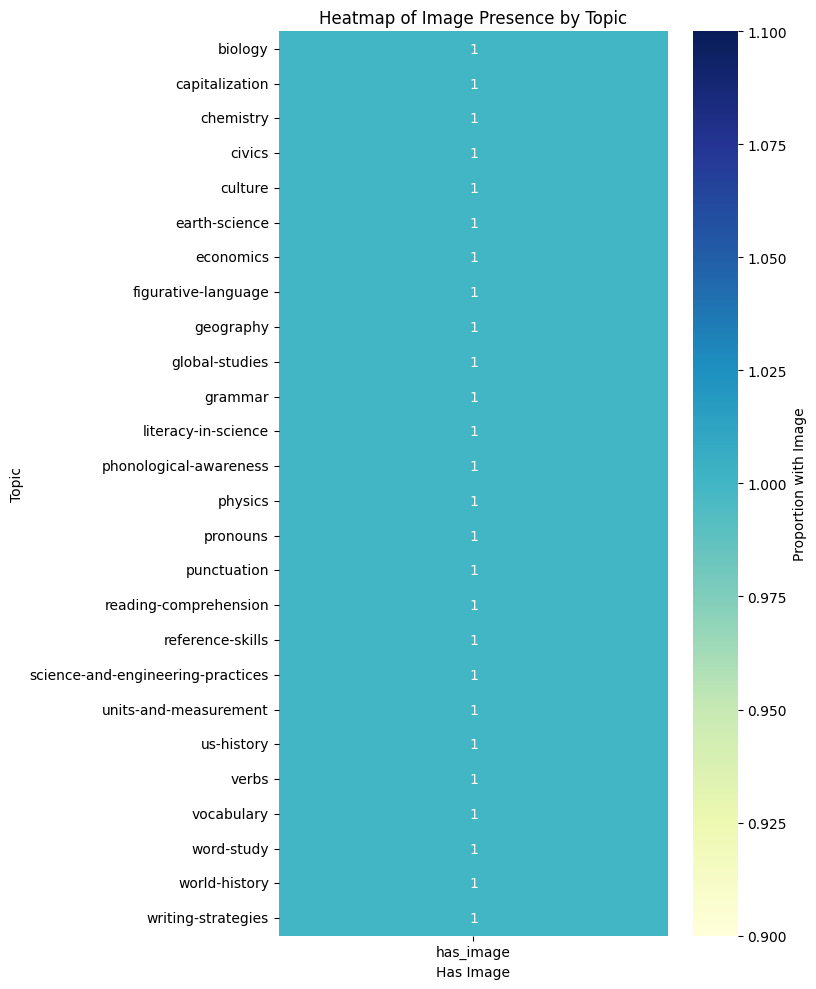

In [ ]:
limport json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# === Load problems.json ===
with open("ScienceQA_DATA/problems.json", "r") as f:
    problems = json.load(f)

# Convert to DataFrame
df = pd.DataFrame.from_dict(problems, orient="index")

# Add derived columns
df["has_image"] = df["image"].apply(lambda x: x != "none")

# --- Pie Chart: Subject Distribution ---
subject_counts = df["subject"].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(subject_counts, labels=subject_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Subject Distribution in ScienceQA")
plt.axis('equal')
plt.tight_layout()
plt.show()

# --- Pie Chart: Top 10 Topics ---
top_topics = df["topic"].value_counts().head(10)

plt.figure(figsize=(7, 7))
plt.pie(top_topics, labels=top_topics.index, autopct='%1.1f%%', startangle=140)
plt.title("Top 10 Topics in ScienceQA")
plt.axis('equal')
plt.tight_layout()
plt.show()

# --- Heatmap: Topic vs Image Presence ---
topic_image_df = df.groupby("topic")["has_image"].mean().sort_values(ascending=False).to_frame()

plt.figure(figsize=(8, 10))
sns.heatmap(topic_image_df, annot=True, cmap="YlGnBu", cbar_kws={"label": "Proportion with Image"})
plt.title("Heatmap of Image Presence by Topic")
plt.xlabel("Has Image")
plt.ylabel("Topic")
plt.tight_layout()
plt.show()
